# (Prosper Loans Dataset Exploration)
## by (Mohamed Magdy Ibrahim Mohamed)

## 1. Preliminary Wrangling

> **Introduction:** This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The dataset can be found [here](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1554484977406000).This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the variables in the data set.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data
loan = pd.read_csv('prosperLoanData.csv')
loan.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

### 1.1 Removing Duplicates in ListingKey column

In [4]:
# Check for duplicates
loan[loan.ListingKey.duplicated()]

ListingKey  ListingNumber            ListingCreationDate  \
9       0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
999     0A0635972629771021E38F3        1055932  2013-12-18 14:25:17.053000000   
2539    2D2635984503681189056B4        1097584  2014-01-11 07:50:08.037000000   
4942    4B7E3590031274113F1FD34         927246  2013-09-26 09:35:36.317000000   
5812    94B035909835592957503E6         920397  2013-09-24 13:27:48.287000000   
...                         ...            ...                            ...   
113548  FB6A35999320129979DBBA3        1158474  2014-01-23 14:33:25.967000000   
113636  D9BF3589576999233477E75         904020  2013-09-17 11:44:43.177000000   
113733  E2303594522341016B8EE15        1002326  2013-11-07 14:26:31.317000000   
113773  DE8535960513435199406CE        1056749  2013-12-06 05:43:13.830000000   
113863  C74335893905744205D4056         928893  2013-09-26 12:53:34.633000000   

       CreditGrade  Term LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  \
9              NaN    36    Current        NaN      0.07620        0.0629   
999            NaN    60    Current        NaN      0.17710        0.1535   
2539           NaN    60    Current        NaN      0.14528        0.1224   
4942           NaN    36    Current        NaN      0.35356        0.3134   
5812           NaN    36    Current        NaN      0.24205        0.2045   
...            ...   ...        ...        ...          ...           ...   
113548         NaN    60    Current        NaN      0.22063        0.1960   
113636         NaN    36    Current        NaN      0.21290        0.1760   
113733         NaN    60    Current        NaN      0.20593        0.1819   
113773         NaN    36    Current        NaN      0.16324        0.1274   
113863         NaN    36    Current        NaN      0.12691        0.0990   

        LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
9            0.0529  ...          -16.77                0.0   
999          0.1435  ...            0.00                0.0   
2539         0.1124  ...            0.00                0.0   
4942         0.3034  ...          -15.98                0.0   
5812         0.1945  ...          -37.03                0.0   
...             ...  ...             ...                ...   
113548       0.1860  ...            0.00                0.0   
113636       0.1660  ...           -9.86                0.0   
113733       0.1719  ...          -24.94                0.0   
113773       0.1174  ...          -16.79                0.0   
113863       0.0890  ...          -15.99                0.0   

        LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
9                         0.0                  0.0   
999                       0.0                  0.0   
2539                      0.0                  0.0   
4942                      0.0                  0.0   
5812                      0.0                  0.0   
...                       ...                  ...   
113548                    0.0                  0.0   
113636                    0.0                  0.0   
113733                    0.0                  0.0   
113773                    0.0                  0.0   
113863                    0.0                  0.0   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
9                                  0.0            1.0                0   
999                                0.0            1.0                0   
2539                               0.0            1.0                0   
4942                               0.0            1.0                0   
5812                               0.0            1.0                0   
...                                ...            ...              ...   
113548                             0.0            1.0                0   
113636                             0.0            1.0                0   
113733                             0.0            1

In [5]:
# Reinforcing the check
loan[loan['ListingKey'] == '0F043596202561788EA13D5']

ListingKey  ListingNumber            ListingCreationDate  \
8  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   

  CreditGrade  Term LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  \
8         NaN    36    Current        NaN       0.0762        0.0629   
9         NaN    36    Current        NaN       0.0762        0.0629   

   LenderYield  ...  LP_ServiceFees  LP_CollectionFees  LP_GrossPrincipalLoss  \
8       0.0529  ...          -16.77                0.0                    0.0   
9       0.0529  ...          -16.77                0.0                    0.0   

   LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  PercentFunded  \
8                  0.0                             0.0            1.0   
9                  0.0                             0.0            1.0   

   Recommendations InvestmentFromFriendsCount InvestmentFromFriendsAmount  \
8                0                          0                         0.0   
9                0                          0                         0.0   

  Investors  
8         1  
9         1  

[2 rows x 81 columns]

In [6]:
# Now drop the duplicates
loan.drop_duplicates(subset=['ListingKey'], inplace=True)

In [7]:
# Ensuring it was done using the previous sample
loan[loan['ListingKey'] == '0F043596202561788EA13D5']

ListingKey  ListingNumber            ListingCreationDate  \
8  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   

  CreditGrade  Term LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  \
8         NaN    36    Current        NaN       0.0762        0.0629   

   LenderYield  ...  LP_ServiceFees  LP_CollectionFees  LP_GrossPrincipalLoss  \
8       0.0529  ...          -16.77                0.0                    0.0   

   LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  PercentFunded  \
8                  0.0                             0.0            1.0   

   Recommendations InvestmentFromFriendsCount InvestmentFromFriendsAmount  \
8                0                          0                         0.0   

  Investors  
8         1  

[1 rows x 81 columns]

> ListingKey & ListingNumber give the same identification for loan. So they can be used interchangeably. I'll check duplicates in ListingNumber (It should be removed as I've just removed duplicates in ListingKey)

In [8]:
# Check for duplicates in ListingNumber
loan[loan.ListingNumber.duplicated()]

Empty DataFrame
Columns: [ListingKey, ListingNumber, ListingCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, GroupKey, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanKey, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing, LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber, LoanMonthsSinceOrigination, LoanNumber, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MemberKey, MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, PercentFunded, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors]
Index: []

[0 rows x 81 columns]

### 1.2 Convert ListingCreationDate to datetime

In [9]:
# Check type
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113066 non-null  object 
 1   ListingNumber                        113066 non-null  int64  
 2   ListingCreationDate                  113066 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113066 non-null  int64  
 5   LoanStatus                           113066 non-null  object 
 6   ClosedDate                           55076 non-null   object 
 7   BorrowerAPR                          113041 non-null  float64
 8   BorrowerRate                         113066 non-null  float64
 9   LenderYield                          113066 non-null  float64
 10  EstimatedEffectiveYield              83982 non-null   float64
 11  EstimatedLoss

In [10]:
# pd.to_datetime
loan['ListingCreationDate'] = pd.to_datetime(loan['ListingCreationDate'])

In [11]:
# Now check it was converted
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113066 non-null  object        
 1   ListingNumber                        113066 non-null  int64         
 2   ListingCreationDate                  113066 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113066 non-null  int64         
 5   LoanStatus                           113066 non-null  object        
 6   ClosedDate                           55076 non-null   object        
 7   BorrowerAPR                          113041 non-null  float64       
 8   BorrowerRate                         113066 non-null  float64       
 9   LenderYield                          113066 non-null  float64       
 

### 1.3 Credit Ratings are segmented into 2 periods: Pre & Post 2009
- There's no one unique column for loans' credit rating. Rather, the ratings are segmented into 2 periods: Pre 2009 (represented by CreditGrade column) & Post 2009 (represented by ProsperRating (Alpha) or ProsperRating (Numeric))
- Since ProsperRating (Alpha) is a categorical variable like CreditGrade, so I'll use it instead of ProsperRating (Numeric)
- Therefore, I'm going to combine them into one column (CreditRating) so that I can study the whole period
- After combining them, I'll look for remaining NaNs and delete them

In [12]:
loan[loan['ListingCreationDate'] < '2009-01-01']

ListingKey  ListingNumber     ListingCreationDate  \
0       1021339766868145413AB3B         193129 2007-08-26 19:09:29.263   
2       0EE9337825851032864889A          81716 2007-01-05 15:00:47.090   
11      0F1734025150298088A5F2B         213551 2007-10-09 20:28:33.640   
17      0FDF336575182398852A8DC          31540 2006-08-15 12:21:09.433   
21      1017340630713945364DA6B         241498 2007-11-30 20:33:49.227   
...                         ...            ...                     ...   
113921  D21A33647075665665BE266              4 2005-11-09 20:44:28.847   
113922  D2293427338962159DA5143         379986 2008-08-08 16:58:54.760   
113923  E334343080922352965DF86         395877 2008-09-10 08:26:30.537   
113926  E34333654295683286C35C2          28121 2006-08-01 10:31:31.143   
113927  E3433419834735803891976         322787 2008-04-30 21:25:19.670   

       CreditGrade  Term  LoanStatus           ClosedDate  BorrowerAPR  \
0                C    36   Completed  2009-08-14 00:00:00      0.16516   
2               HR    36   Completed  2009-12-17 00:00:00      0.28269   
11               C    36   Completed  2008-01-07 00:00:00      0.15033   
17              AA    36  Chargedoff  2008-05-22 00:00:00      0.13202   
21               D    36   Completed  2010-12-12 00:00:00      0.21488   
...            ...   ...         ...                  ...          ...   
113921          AA    36   Completed  2005-11-25 00:00:00          NaN   
113922           C    36   Completed  2011-08-19 00:00:00      0.15094   
113923           B    36   Completed  2011-09-23 00:00:00      0.22378   
113926           E    36   Defaulted  2007-09-06 00:00:00      0.29776   
113927          AA    36   Completed  2011-05-09 00:00:00      0.07469   

        BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0             0.1580       0.1380  ...         -133.18                0.0   
2             0.2750       0.2400  ...          -24.20                0.0   
11            0.1325       0.1225  ...           -0.88                0.0   
17            0.1250       0.1175  ...          -54.61                0.0   
21            0.2075       0.1975  ...          -51.12                0.0   
...              ...          ...  ...             ...                ...   
113921        0.0400       0.0350  ...           -0.88                0.0   
113922        0.1295       0.1195  ...          -81.95                0.0   
113923        0.2089       0.1989  ...         -135.50                0.0   
113926        0.2900       0.2850  ...           -9.34                0.0   
113927        0.0679       0.0579  ...          -68.47                0.0   

        LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
0                        0.00                 0.00   
2                        0.00                 0.00   
11                       0.00                 0.00   
17                    6012.65              6012.67   
21                       0.00                 0.00   
...                       ...                  ...   
113921                   0.00                 0.00   
113922                   0.00                 0.00   
113923                   0.00                 0.00   
113926                2536.11              2536.10   
113927                   0.00                 0.00   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
0                                 0.00            1.0                0   
2                                 0.00            1.0                0   
11                                0.00            1.0                0   
17                              268.96            1.0                0   
21                                0.00            1.0                0   
...                                ...            ...              ...   
113921                            0.00            1.0                0   
113922                            0.00            1.0                0   
113

> As there is another colum for rating ProsperRating (numeric), I need to use the column with the same rating style of CreditGrade which is ProsperRating (Alpha)

In [13]:
# Check value counts
loan['ProsperRating (Alpha)'].value_counts()

C     18096
B     15368
A     14390
D     14170
E      9716
HR     6917
AA     5325
Name: ProsperRating (Alpha), dtype: int64

In [14]:
# First creat the new column (CreditRating)
# to be the same as (CreditGrade)
loan['CreditRating'] = loan['CreditGrade']

In [15]:
# Fill NaNs in CreditRating with 
# values in ProsperRating (Alpha)
loan['CreditRating'].fillna(loan['ProsperRating (Alpha)'], inplace=True)

In [16]:
# How many NaNs are left
loan['CreditRating'].isnull().sum()

131

In [17]:
# Remove these NaNs
loan.dropna(subset=['CreditRating'], inplace=True)

In [18]:
# Check NaNs are removed
loan['CreditRating'].isnull().sum()

0

In [19]:
# Check value counts for CreditRating
loan['CreditRating'].value_counts()

C     23745
B     19757
D     19323
A     17705
E     13005
HR    10425
AA     8834
NC      141
Name: CreditRating, dtype: int64

> Refering to the definition of ProsperRating (Numeric) in the google sheet, there's no rating of NC. So, I'll remove theses values. It won't affect the shape of data as it has only 141 values out of the total 112K 

In [20]:
# Remove rows containg NC
loan.drop(loan[loan['CreditRating'] =='NC'].index, inplace = True)

In [21]:
# Check value counts for CreditRating
loan['CreditRating'].value_counts()

C     23745
B     19757
D     19323
A     17705
E     13005
HR    10425
AA     8834
Name: CreditRating, dtype: int64

> CreditRating is the loan's rating and it's ranked from worst to best as: HR, E, D, C, B, A, AA

### 1.4 Check for other NaNs to be deleted

In [22]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112794 entries, 0 to 113936
Data columns (total 82 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           112794 non-null  object        
 1   ListingNumber                        112794 non-null  int64         
 2   ListingCreationDate                  112794 non-null  datetime64[ns]
 3   CreditGrade                          28812 non-null   object        
 4   Term                                 112794 non-null  int64         
 5   LoanStatus                           112794 non-null  object        
 6   ClosedDate                           54804 non-null   object        
 7   BorrowerAPR                          112770 non-null  float64       
 8   BorrowerRate                         112794 non-null  float64       
 9   LenderYield                          112794 non-null  float64       
 

### 1.4 Choosing the final number of columns to work with
- As this dataset contains large number of columns (82), I'll subset a group of them so they can be easily visible
- I've chosen these columns as I think they will allow me to answer the questions correctly
- **Theses columns are:** ListingNumber, ListingCreationDate, Investors, Term, CreditRating, LoanStatus, BorrowerAPR,  BorrowerRate, LenderYield, ProsperScore, BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, IncomeRange, IncomeVerifiable, TotalProsperLoans, LoanOriginalAmount, PercentFunded, Recommendations

In [23]:
loan_subset = loan[["ListingNumber", "ListingCreationDate", "Investors",
                    "Term", "CreditRating", "LoanStatus", "BorrowerAPR", 
                    "BorrowerRate", "LenderYield", "ProsperScore", 
                    "BorrowerState", "Occupation", "EmploymentStatus",
                    "EmploymentStatusDuration", "IsBorrowerHomeowner", "IncomeRange", 
                    "IncomeVerifiable", "TotalProsperLoans",
                    "LoanOriginalAmount", "PercentFunded", "Recommendations"]]

In [24]:
loan_subset.head()

ListingNumber     ListingCreationDate  Investors  Term CreditRating  \
0         193129 2007-08-26 19:09:29.263        258    36            C   
1        1209647 2014-02-27 08:28:07.900          1    36            A   
2          81716 2007-01-05 15:00:47.090         41    36           HR   
3         658116 2012-10-22 11:02:35.010        158    36            A   
4         909464 2013-09-14 18:38:39.097         20    36            D   

  LoanStatus  BorrowerAPR  BorrowerRate  LenderYield  ProsperScore  ...  \
0  Completed      0.16516        0.1580       0.1380           NaN  ...   
1    Current      0.12016        0.0920       0.0820           7.0  ...   
2  Completed      0.28269        0.2750       0.2400           NaN  ...   
3    Current      0.12528        0.0974       0.0874           9.0  ...   
4    Current      0.24614        0.2085       0.1985           4.0  ...   

      Occupation EmploymentStatus EmploymentStatusDuration  \
0          Other    Self-employed                      2.0   
1   Professional         Employed                     44.0   
2          Other    Not available                      NaN   
3  Skilled Labor         Employed                    113.0   
4      Executive         Employed                     44.0   

   IsBorrowerHomeowner     IncomeRange IncomeVerifiable  TotalProsperLoans  \
0                 True  $25,000-49,999             True                NaN   
1                False  $50,000-74,999             True                NaN   
2                False   Not displayed             True                NaN   
3                 True  $25,000-49,999             True                NaN   
4                 True       $100,000+             True                1.0   

   LoanOriginalAmount  PercentFunded  Recommendations  
0                9425            1.0                0  
1               10000            1.0                0  
2                3001            1.0                0  
3               10000            1.0                0  
4               15000            1.0                0  

[5 rows x 21 columns]

In [25]:
loan_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112794 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ListingNumber             112794 non-null  int64         
 1   ListingCreationDate       112794 non-null  datetime64[ns]
 2   Investors                 112794 non-null  int64         
 3   Term                      112794 non-null  int64         
 4   CreditRating              112794 non-null  object        
 5   LoanStatus                112794 non-null  object        
 6   BorrowerAPR               112770 non-null  float64       
 7   BorrowerRate              112794 non-null  float64       
 8   LenderYield               112794 non-null  float64       
 9   ProsperScore              83982 non-null   float64       
 10  BorrowerState             107333 non-null  object        
 11  Occupation                109307 non-null  object        
 12  Em

In [26]:
loan_subset.shape

(112794, 21)

In [27]:
# descriptive statistics for numeric variables
loan_subset.describe()

ListingNumber      Investors           Term    BorrowerAPR  \
count   1.127940e+05  112794.000000  112794.000000  112770.000000   
mean    6.258513e+05      80.854824      40.811958       0.218998   
std     3.269378e+05     103.341559      10.431064       0.080488   
min     4.000000e+00       1.000000      12.000000       0.006530   
25%     4.001585e+05       2.000000      36.000000       0.156290   
50%     5.987375e+05      44.000000      36.000000       0.209840   
75%     8.858078e+05     116.000000      36.000000       0.283860   
max     1.255725e+06    1189.000000      60.000000       0.512290   

        BorrowerRate    LenderYield  ProsperScore  EmploymentStatusDuration  \
count  112794.000000  112794.000000  83982.000000             105310.000000   
mean        0.192944       0.182885      5.952871                 96.087722   
std         0.074911       0.074606      2.373897                 94.454736   
min         0.000000      -0.010000      1.000000                  0.000000   
25%         0.134000       0.124500      4.000000                 26.000000   
50%         0.184000       0.174000      6.000000                 67.000000   
75%         0.250600       0.240600      8.000000                137.000000   
max         0.497500       0.492500     11.000000                755.000000   

       TotalProsperLoans  LoanOriginalAmount  PercentFunded  Recommendations  
count       21864.000000       112794.000000  112794.000000    112794.000000  
mean            1.421195         8327.054187       0.998569         0.048398  
std             0.764325         6238.181033       0.018009         0.333815  
min             0.000000         1000.000000       0.700000         0.000000  
25%             1.000000         4000.000000       1.000000         0.000000  
50%             1.000000         6488.500000       1.000000         0.000000  
75%             2.000000        12000.000000       1.000000         0.000000  
max             8.000000        35000.000000       1.012500        39.000000

### What is the structure of your dataset?

> 112794 listing of loans & 20 variables. Many of them are numeric. These are the categorical variables:
- CreditRating
- IncomeRange
- BorrowerState
- EmploymentStatus
- Occupation
- LoanStatus

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in studying the variables that determine the level of interest rate that clients borrow at (BorrowerRate). Furthermore, I'll focus on the factors determining the loan funding percentage and the amount of loan to be credited

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that loan amount, employment status, income group, owning a home, having the income proof documents, the state where the borrower lives, loan duration, and credit rating, all to be key factors in determing the interest rate

> I also expect that the employment status to be a major factor in determining the loan funding percentage and the amount of loan to be credited  

## 2. Univariate Exploration



### 2.1 Histograms for numeric variables

In [28]:
# Create a function to display histograms
def myHist(df, var):
    '''this function aims at making a ready-made histograms when specifying the dataframe and the numeric variable to use'''
    plt.hist(data=df, x=var, edgecolor='black')
    plt.title(f'Distribution of {var}'.title())
    plt.xlabel(var)
    plt.ylabel('Frequency');

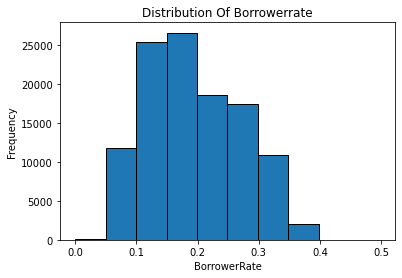

In [29]:
# BorrowerRate
myHist(loan_subset, 'BorrowerRate')

> The Borrower Rate is rightly skewed.

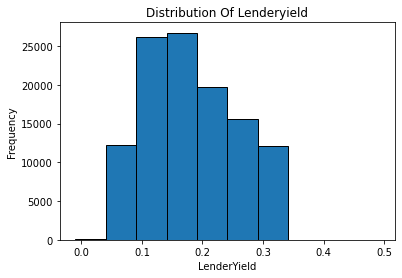

In [30]:
# LenderYield
myHist(loan_subset, 'LenderYield')

> The Lender Yield is rightly skewed.

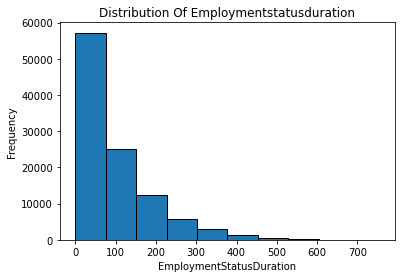

In [31]:
# EmploymentStatusDuration
myHist(loan_subset, 'EmploymentStatusDuration')

> It seems to need a log transformation

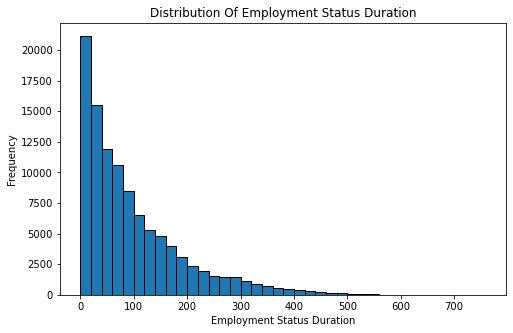

In [32]:
binsize = 20
bins = np.arange(0, loan_subset['EmploymentStatusDuration'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_subset, x = 'EmploymentStatusDuration', bins = bins, edgecolor='black')
plt.xlabel('Employment Status Duration')
plt.title('Distribution of Employment Status Duration'.title())
plt.ylabel('Frequency')
plt.show()

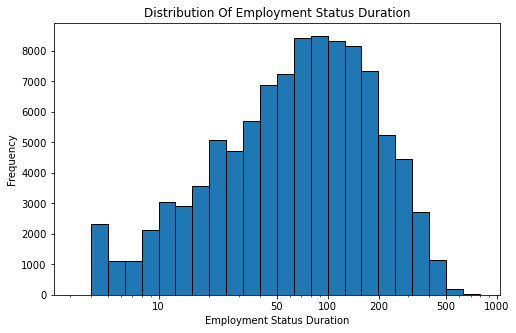

In [33]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.1
bins = 10 ** np.arange(0.5, np.log10(loan_subset['EmploymentStatusDuration'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_subset, x = 'EmploymentStatusDuration', bins = bins, edgecolor='black')
plt.xscale('log')
plt.xticks([10, 50, 100, 200, 500, 1000], ['10', '50', '100', '200', '500', '1000'])
plt.xlabel('Employment Status Duration')
plt.title('Distribution of Employment Status Duration'.title())
plt.ylabel('Frequency')
plt.show()

> Now it seems close to the normal distribution

In [34]:
# Histogram for Term won't be useful as it has only 3 variables
# It's more appropriate to use bar charts
loan_subset['Term'].value_counts()

36    86953
60    24228
12     1613
Name: Term, dtype: int64

In [35]:
# Create a function to display ordered bar charts
def myBar(df, var):
    '''this function aims at making a ready-made bar ordered chart when specifying the dataframe 
    and the numeric variable to use'''
    # Count the frequency of each unique value in the 'Term'
    # column, and sort it in descending order
    freq = df[var].value_counts()
    
    # Choose color
    base_color = sb.color_palette()[0]
    
    # Get the indexes of the Series
    genorder = freq.index
    
    # Plot the bar chart in the decreasing order of the frequency of Term
    sb.countplot(data=df, x=var, color=base_color,
    order=genorder);
    plt.title(f'Count of {var} for each type'.title())
    plt.xlabel(var)
    plt.ylabel('Count');

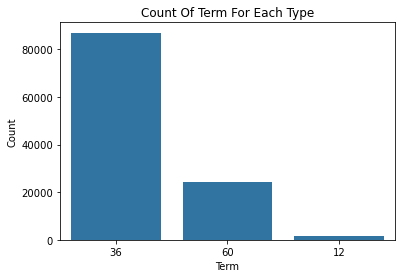

In [36]:
# bar chart for term
myBar(loan_subset, 'Term')

In [37]:
# 8 variables would fit also for bar chart
loan_subset['TotalProsperLoans'].value_counts()

1.0    15382
2.0     4495
3.0     1432
4.0      413
5.0      103
6.0       29
7.0        8
0.0        1
8.0        1
Name: TotalProsperLoans, dtype: int64

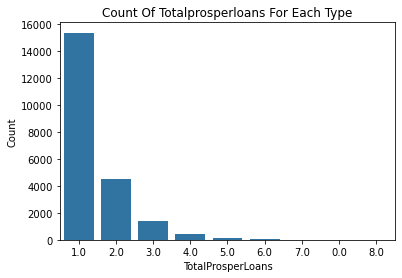

In [38]:
# bar chart for TotalProsperLoans
myBar(loan_subset, 'TotalProsperLoans')

In [39]:
# EmploymentStatus: beest for bar chart
loan_subset['EmploymentStatus'].value_counts()

Employed         66586
Full-time        26250
Self-employed     6048
Not available     5248
Other             3742
Part-time         1081
Not employed       835
Retired            791
Name: EmploymentStatus, dtype: int64

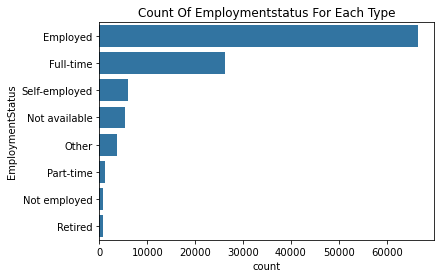

In [40]:
# EmploymentStatus bar chart
# TotalProsperLoans bar chart
# Count the frequency of each unique value in the
# column, and sort it in descending order
freq_emp = loan_subset['EmploymentStatus'].value_counts()

base_color = sb.color_palette()[0]

# Get the indexes of the Series
gen_emp_order = freq_emp.index

# Plot the bar chart in the decreasing order of the frequency
sb.countplot(data=loan_subset, y='EmploymentStatus', color=base_color,
order=gen_emp_order)
plt.title('Count of EmploymentStatus for each type'.title());

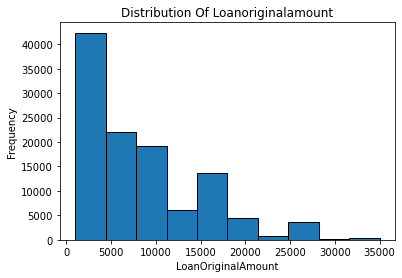

In [41]:
# Histogram for LoanOriginalAmount
myHist(loan_subset, 'LoanOriginalAmount')

> The Loan Original Amount is rightly skewed. It seems that the majority of loans are small ones (probably for low to medium income clients)

In [42]:
# It needs log transformation
# But first, we need to know the limits in log transformation
np.log10(loan_subset['LoanOriginalAmount'].describe())

count    5.052286
mean     3.920491
std      3.795058
min      3.000000
25%      3.602060
50%      3.812144
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

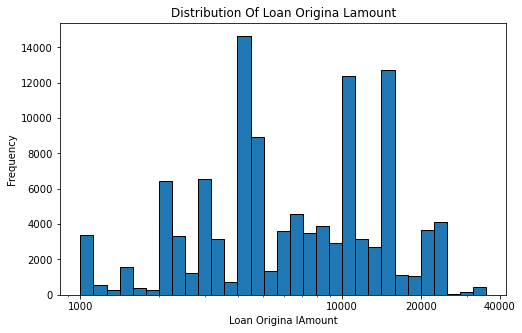

In [43]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize3 = 0.05
bins3 = 10 ** np.arange(3, np.log10(loan_subset['LoanOriginalAmount'].max())+log_binsize3, log_binsize3)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_subset, x = 'LoanOriginalAmount', bins = bins3, edgecolor='black')
plt.xscale('log')
plt.xticks([1000, 10000, 20000, 40000], ['1000', '10000', '20000', '40000'])
plt.xlabel('Loan Origina lAmount')
plt.title('Distribution of Loan Origina lAmount'.title())
plt.ylabel('Frequency')
plt.show()

> The log transformation affirms our prior conclusion that the majority of loans are of small amounts (probably for low to medium income clients). However, the distribution became ambiguous (seems to be multimodal)

In [44]:
# The majority of loans are fully funded
loan_subset['PercentFunded'].value_counts()

1.0000    111924
0.9998         5
0.7000         4
0.8087         4
0.7784         3
           ...  
0.8167         1
0.7854         1
0.7903         1
0.7167         1
0.9575         1
Name: PercentFunded, Length: 719, dtype: int64

In [45]:
# CreditRating
loan_subset['CreditRating'].value_counts()

C     23745
B     19757
D     19323
A     17705
E     13005
HR    10425
AA     8834
Name: CreditRating, dtype: int64

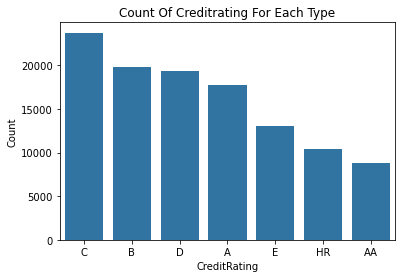

In [46]:
# bar chart for CreditRating
myBar(loan_subset, 'CreditRating')

> Most of loans are of middle credit ratings (C, B, D)

In [47]:
# IncomeRange values
loan_subset['IncomeRange'].value_counts()

$25,000-49,999    31900
$50,000-74,999    30704
$100,000+         17172
$75,000-99,999    16763
Not displayed      7600
$1-24,999          7228
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

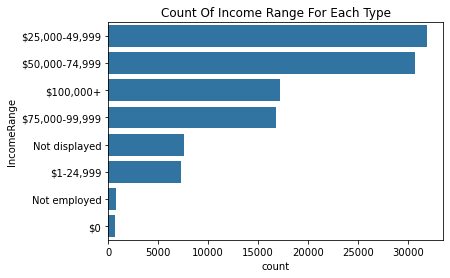

In [48]:
# IncomeRange bar chart

# Count the frequency of each unique value in the
# column, and sort it in descending order
freq_range = loan_subset['IncomeRange'].value_counts()

# Get the indexes of the Series
gen_range_order = freq_range.index

# Plot the bar chart in the decreasing order of the frequency
sb.countplot(data=loan_subset, y='IncomeRange', color=base_color,
order=gen_range_order)
plt.title('Count of Income Range for each type'.title());

> Most of the loans were granted to middle and upper income classes

In [49]:
# IncomeVerifiable values
loan_subset['IncomeVerifiable'].value_counts()

True     104223
False      8571
Name: IncomeVerifiable, dtype: int64

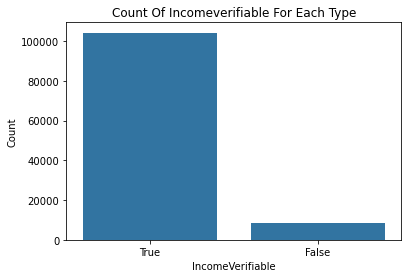

In [50]:
# IncomeVerifiable bar chart
myBar(loan_subset, 'IncomeVerifiable')

> Most of the granted loans are supplemented with the required documentation to support clients' income.

In [51]:
# Investors values
loan_subset['Investors'].value_counts()

1      27177
2       1370
3        978
4        816
5        750
       ...  
609        1
881        1
801        1
752        1
831        1
Name: Investors, Length: 751, dtype: int64

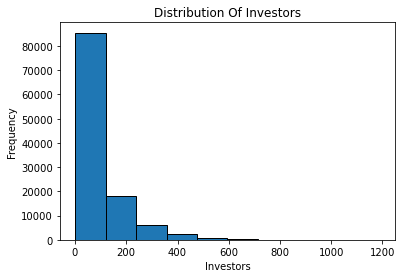

In [52]:
# Investors histogram (needs log transformation)
myHist(loan_subset, 'Investors')

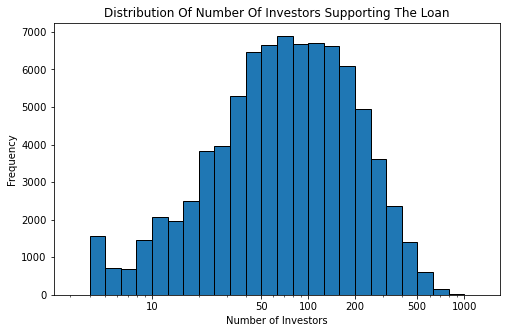

In [53]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize2 = 0.1
bins2 = 10 ** np.arange(0.5, np.log10(loan_subset['Investors'].max())+log_binsize2, log_binsize2)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_subset, x = 'Investors', bins = bins2, edgecolor='black')
plt.xscale('log')
plt.xticks([10, 50, 100, 200, 500, 1000], ['10', '50', '100', '200', '500', '1000'])
plt.xlabel('Number of Investors')
plt.title('Distribution of Number of investors supporting the loan'.title())
plt.ylabel('Frequency')
plt.show()

> Now it seems close to the normal distribution

In [54]:
# LoanStatus values
loan_subset['LoanStatus'].value_counts()

Current                   55730
Completed                 37897
Chargedoff                11951
Defaulted                  4951
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

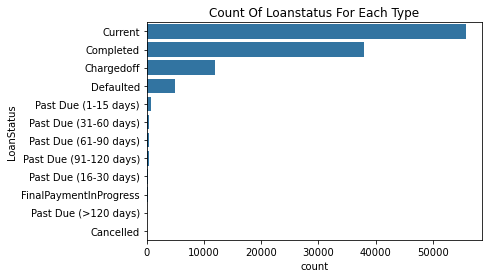

In [55]:
# LoanStatus bar chart

# Count the frequency of each unique value in the
# column, and sort it in descending order
freq_status = loan_subset['LoanStatus'].value_counts()

# Get the indexes of the Series
gen_status_order = freq_status.index

# Plot the bar chart in the decreasing order of the frequency
sb.countplot(data=loan_subset, y='LoanStatus', color=base_color,
order=gen_status_order);
plt.title('Count of LoanStatus for each type'.title());

> The largest bulk of loans is still ongoing, where a considerable amount has completed successfully. It seems that the defaulted loans are small, suggesting to be within acceptable standards

In [56]:
# BorrowerState vlues
loan_subset['BorrowerState'].value_counts()

CA    14562
TX     6756
FL     6656
NY     6649
IL     5858
GA     4961
OH     4161
MI     3564
VA     3249
NC     3061
NJ     3059
WA     3016
PA     2947
MD     2794
MO     2591
MN     2302
MA     2219
CO     2183
IN     2067
AZ     1880
WI     1826
OR     1804
TN     1725
AL     1660
CT     1607
SC     1106
NV     1077
KS     1049
KY      973
OK      965
LA      939
UT      871
AR      851
MS      782
NE      663
ID      588
NH      546
NM      467
RI      431
HI      406
WV      384
DC      377
MT      326
DE      298
VT      204
AK      199
IA      186
SD      185
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

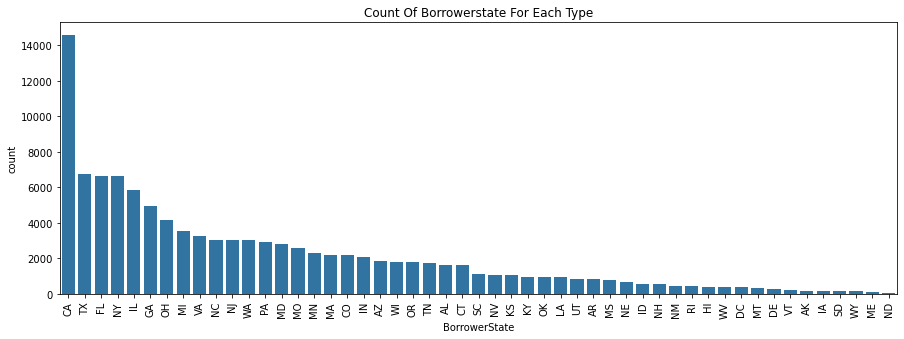

In [57]:
# BorrowerState bar chart

# Count the frequency of each unique value in the
# column, and sort it in descending order
freq_state = loan_subset['BorrowerState'].value_counts()

# Get the indexes of the Series
gen_state_order = freq_state.index

# Plot the bar chart in the decreasing order of the frequency
plt.figure(figsize = [15,5])
sb.countplot(data=loan_subset, x='BorrowerState', color=base_color,
order=gen_state_order)
plt.xticks(rotation = 90)
plt.title('Count of BorrowerState for each type'.title());

> Most of the borrowers are from California, Texas, Florida and New York

In [58]:
# Occupation
loan_subset['Occupation'].value_counts()

Other                          28364
Professional                   13506
Computer Programmer             4431
Executive                       4276
Teacher                         3724
                               ...  
Dentist                           67
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

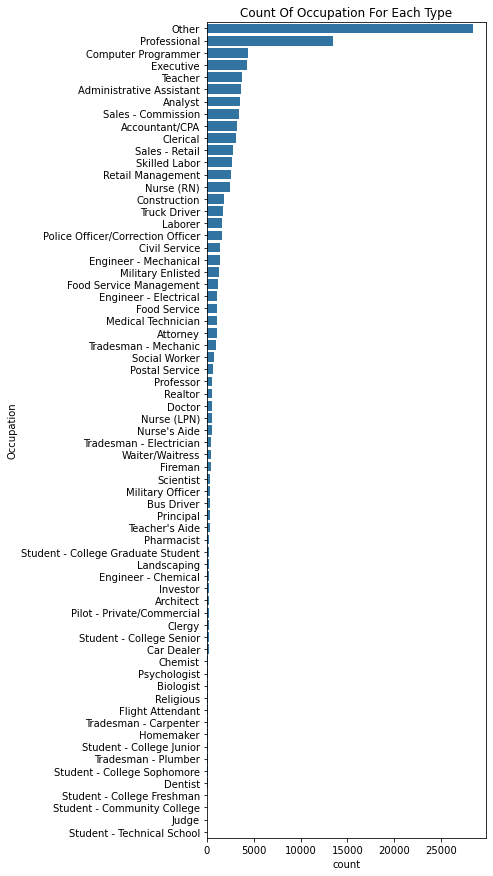

In [59]:
# Occupation bar chart

# Count the frequency of each unique value in the
# column, and sort it in descending order
freq_occ = loan_subset['Occupation'].value_counts()

# Get the indexes of the Series
gen_occ_order = freq_occ.index

# Plot the bar chart in the decreasing order of the frequency
plt.figure(figsize = [5,15])
sb.countplot(data=loan_subset, y='Occupation', color=base_color,
order=gen_occ_order);
plt.title('Count of Occupation for each type'.title());

> Most of the loans were granted to professionals, computer programmers and excutive management members. However, the major bulk is other (not properly specified)

In [60]:
# IsBorrowerHomeowner values
loan_subset['IsBorrowerHomeowner'].value_counts()

True     56986
False    55808
Name: IsBorrowerHomeowner, dtype: int64

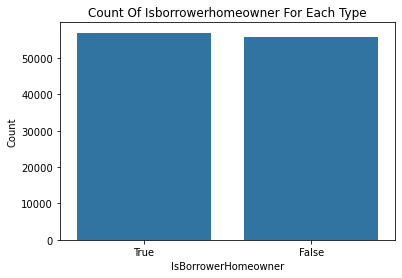

In [61]:
# IsBorrowerHomeowner bar chart
#sb.countplot(data=loan_subset, x='IsBorrowerHomeowner', color=base_color);
myBar(loan_subset, 'IsBorrowerHomeowner');

> Surprisingly, home owners and non-home owners have almost equal opportunities to get loans

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The variables (LoanOriginalAmount, Investors, EmploymentStatusDuration) looked totally skewed to the right, so I applied a log transformation where the variables finally appeared as bell-shaped (normally distributed). LoanOriginalAmount seems to be multimodal 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Before moving to the univariate exploration step, I've already cleaned the CreditRating column by deleting all NC values as this rating is out the ratings list (as mentioned in the definition of ProsperRating (numeric))

> Surprisingly, home owners and non-home owners have almost equal opportunities to get loans

## 3. Bivariate Exploration



### 3.1 Scatter Plots

In [62]:
# Recall what're our variables
loan_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112794 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ListingNumber             112794 non-null  int64         
 1   ListingCreationDate       112794 non-null  datetime64[ns]
 2   Investors                 112794 non-null  int64         
 3   Term                      112794 non-null  int64         
 4   CreditRating              112794 non-null  object        
 5   LoanStatus                112794 non-null  object        
 6   BorrowerAPR               112770 non-null  float64       
 7   BorrowerRate              112794 non-null  float64       
 8   LenderYield               112794 non-null  float64       
 9   ProsperScore              83982 non-null   float64       
 10  BorrowerState             107333 non-null  object        
 11  Occupation                109307 non-null  object        
 12  Em

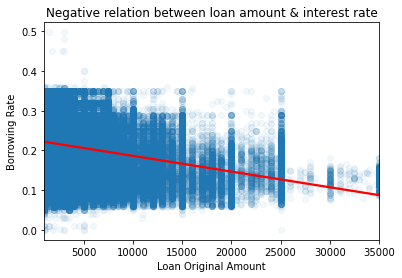

In [63]:
# Relation between borrower's rate & Loan Original Amount
sb.regplot(data = loan_subset, x = 'LoanOriginalAmount', y = 'BorrowerRate', scatter_kws={'alpha':1/20},
          line_kws={"color": "red"})
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrowing Rate')
plt.title('Negative relation between loan amount & interest rate');

> As the amount of loan increases, the client will pay lower interest rate

In [64]:
# Look at the values of Recommendations to determine the best plot
loan_subset.Recommendations.value_counts()

0     108547
1       3505
2        567
3        108
4         26
5         14
9          6
7          5
6          4
8          3
16         2
18         2
24         1
14         1
19         1
21         1
39         1
Name: Recommendations, dtype: int64

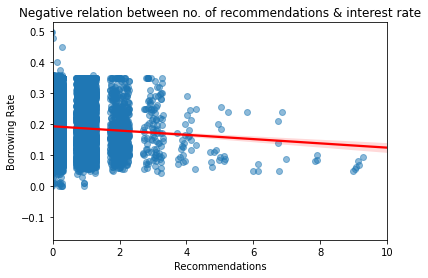

In [65]:
# Relation between borrower's rate & Recommendations
sb.regplot(data = loan_subset, x = 'Recommendations', y = 'BorrowerRate', scatter_kws={'alpha':1/2},
          line_kws={"color": "red"}, x_jitter=0.3)
plt.xlim(0,10) # limit axis to see values in a better way
plt.ylabel('Borrowing Rate')
plt.title('Negative relation between no. of recommendations & interest rate');

> The more recommendations the client receives mto get the loan, the lower interest rate he'll pay 

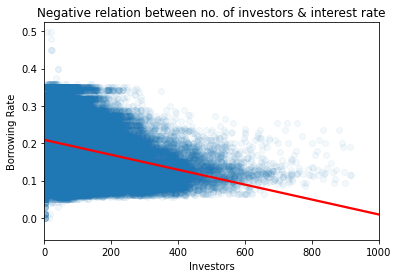

In [66]:
# Relation between borrower's rate & Investors
sb.regplot(data = loan_subset, x = 'Investors', y = 'BorrowerRate', scatter_kws={'alpha':1/20},
          line_kws={"color": "red"}, x_jitter=0.03)
plt.xlim(0,1000); # limit axis to see values in a better way
plt.ylabel('Borrowing Rate')
plt.title('Negative relation between no. of investors & interest rate');

> As the number of investors who funds the loan increases, the borrowers will be more trusted so they will be charged lower borrowing rates

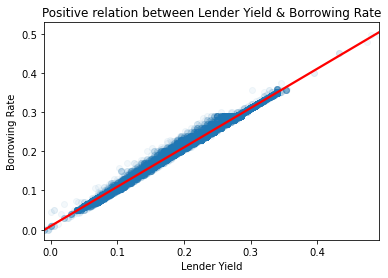

In [67]:
# Relation between borrower's rate & Investors
sb.regplot(data = loan_subset, x = 'LenderYield', y = 'BorrowerRate', scatter_kws={'alpha':1/20},
          line_kws={"color": "red"})
plt.ylabel('Borrowing Rate')
plt.xlabel('Lender Yield')
plt.title('Positive relation between Lender Yield & Borrowing Rate');

In [68]:
# Let's look at the pairwise correlations between the variables that I focus on
numeric_vars = ['Investors', 'Term', 'BorrowerRate', 'LenderYield', 
                'EmploymentStatusDuration', 'TotalProsperLoans', 
                'LoanOriginalAmount', 'PercentFunded', 'Recommendations']
categoric_vars = ['CreditRating', 'LoanStatus', 'BorrowerState',
                 'Occupation', 'EmploymentStatus', 'IncomeRange']

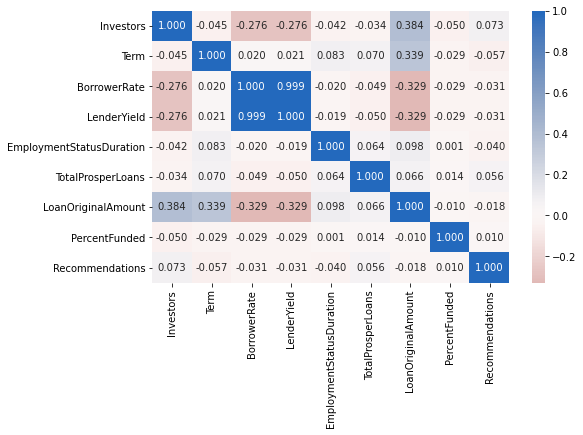

In [69]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan_subset[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

> In general, there're weak correlations in both directions (positive & negative) as the correlation coefficients don't exceed 0.4. The correlation between borrower's rate & lender yield is an exception (0.99), which is intuitive as the lender yeild = borrower's rate - servicing fees

### 3.2 Box Plots

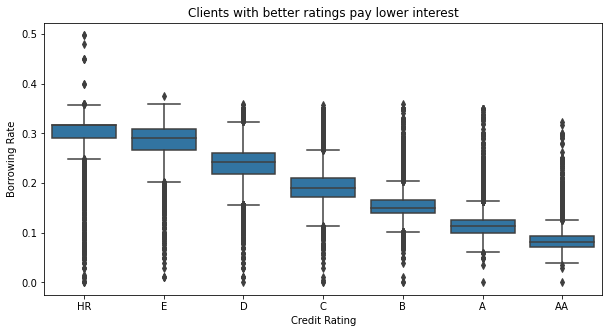

In [70]:
# Relation between borrower's rate & credit rating
# Ratings from low to High NC, HR, E, D, C, B, A, AA
ratings_classes = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']

# Returns the types for ratings_classes with the categories and orderedness

creditratings = pd.api.types.CategoricalDtype(ordered=True, categories=ratings_classes)

# Use pandas.astype() to convert the "CreditRating" column from a plain object type into an ordered categorical type
loan_subset['CreditRating'] = loan_subset['CreditRating'].astype(creditratings)

plt.figure(figsize=[10, 5])
sb.boxplot(data=loan_subset, x='CreditRating', y='BorrowerRate', color = base_color)
plt.xlabel('Credit Rating')
plt.ylabel('Borrowing Rate')
plt.title('Clients with better ratings pay lower interest');

> As the logic suggests, loans with low credit rating are charged with higher interest rates as they are more risky

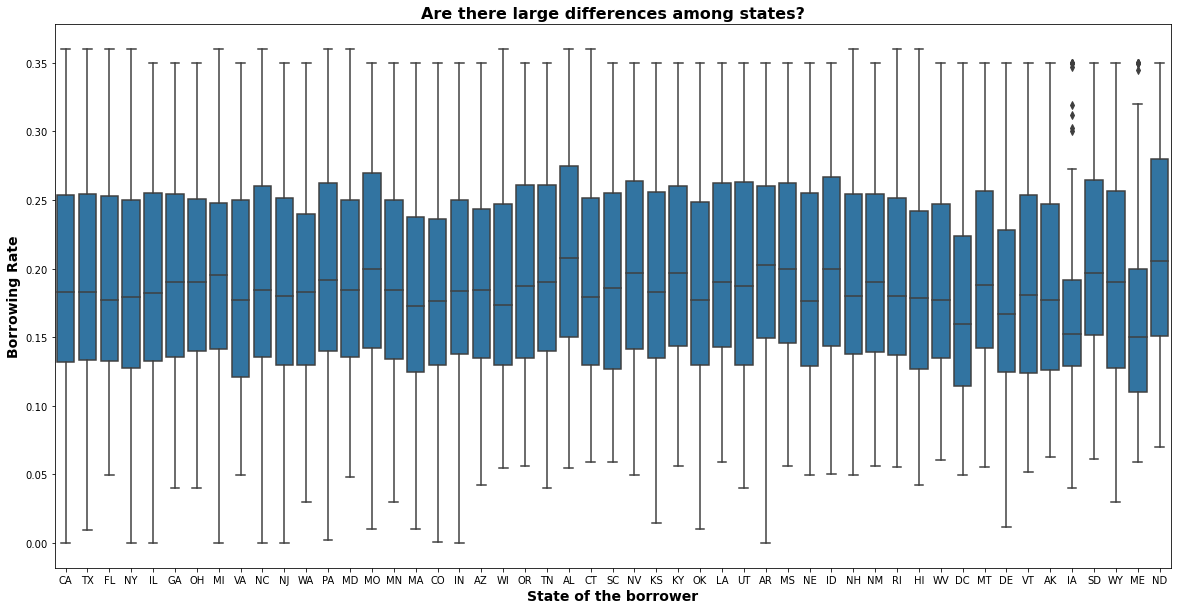

In [71]:
# Are borrowers from different states charged differently?
plt.figure(figsize=[20, 10])
sb.boxplot(data=loan_subset, x='BorrowerState', y='BorrowerRate', color = base_color,
          order=gen_state_order); # order by the states that most clients are from
plt.xlabel('State of the borrower', fontsize=14, weight="bold")
plt.ylabel('Borrowing Rate', fontsize=14, weight="bold")
plt.title('Are there large differences among states?', fontsize=16, weight="bold");

> There's no clear evidence for such discrimination. The median borrowing rate for all states seems to hover around 20%

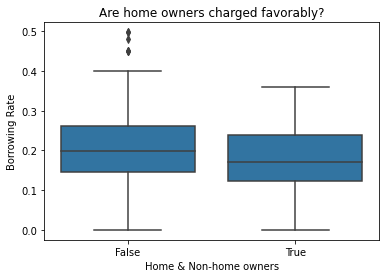

In [72]:
# Are home owners charged favorably?
sb.boxplot(data=loan_subset, x='IsBorrowerHomeowner', y='BorrowerRate', color = base_color)
plt.title('Are home owners charged favorably?')
plt.xlabel('Home & Non-home owners')
plt.ylabel('Borrowing Rate');

> Certainly, non-home owners are charged higher interest rates than home owners. However, we can say that the difference is not a big deal

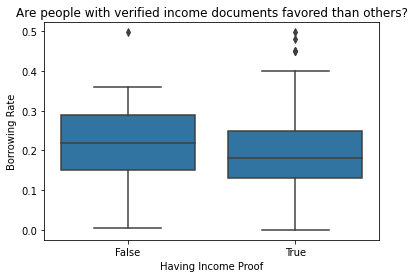

In [73]:
# Are people with verified documents favored than others?
sb.boxplot(data=loan_subset, x='IncomeVerifiable', y='BorrowerRate', color = base_color)
plt.xlabel('Having Income Proof')
plt.ylabel('Borrowing Rate');
plt.title('Are people with verified income documents favored than others?');

> People with verified documents favored are charged lower interest rates than others. However, we can say that the difference is not a big deal

In [74]:
loan_subset['IncomeRange'].value_counts()

$25,000-49,999    31900
$50,000-74,999    30704
$100,000+         17172
$75,000-99,999    16763
Not displayed      7600
$1-24,999          7228
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

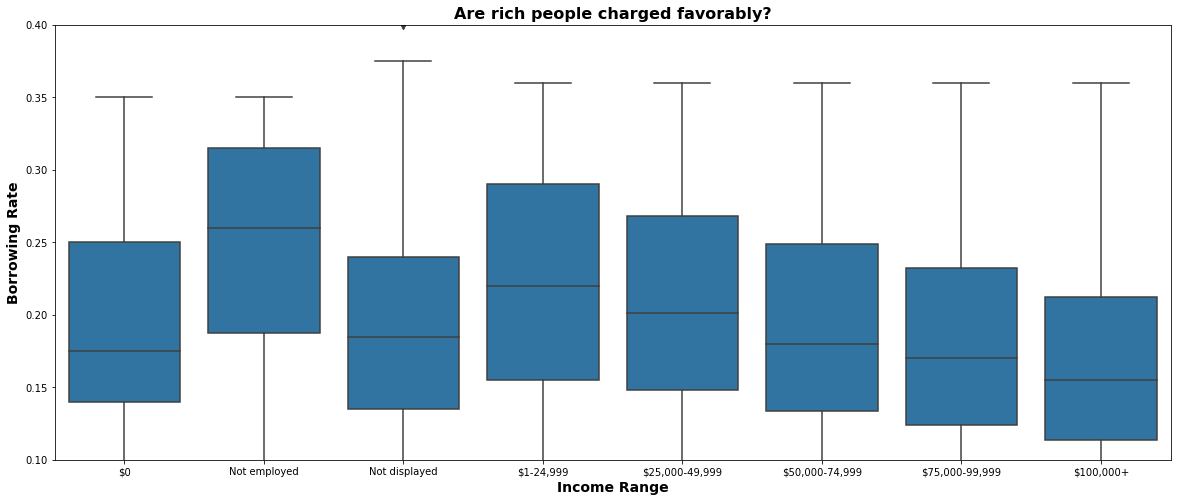

In [75]:
#IncomeRange
# Relation between borrower's rate & income range group
# income range from low to High
income_classes = ['$0', 'Not employed', 'Not displayed', '$1-24,999', 
                  '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', 
                  '$100,000+']

# Returns the types for ratings_classes with the categories and orderedness

incomeranges = pd.api.types.CategoricalDtype(ordered=True, categories=income_classes)

# Use pandas.astype() to convert the "CreditRating" column from a plain object type into an ordered categorical type
loan_subset['IncomeRange'] = loan_subset['IncomeRange'].astype(incomeranges)

plt.figure(figsize=[20, 8])
sb.boxplot(data=loan_subset, x='IncomeRange', y='BorrowerRate', color = base_color)
plt.ylim([0.1, 0.4]) # to make it more clear, I trim y axis to display differences
plt.title('Are rich people charged favorably?', fontsize=16, weight="bold")
plt.xlabel('Income Range', fontsize=14, weight="bold")
plt.ylabel('Borrowing Rate', fontsize=14, weight="bold");

> There's no clear distinction between unemplyed people, those with 0 income and the (not displayed category). But, we can build our analysis based on unemplyed group & other income segments. Here, it's clear that clients from low income groups are charged higher interest rates than those in upper income groups

In [76]:
# Recall Employment Status
loan_subset['EmploymentStatus'].value_counts()

Employed         66586
Full-time        26250
Self-employed     6048
Not available     5248
Other             3742
Part-time         1081
Not employed       835
Retired            791
Name: EmploymentStatus, dtype: int64

In [77]:
def box_plot_emp_status():
    #EmploymentStatus
    # Relation between borrower's rate & employment status
    # employment status from employment to unemployment
    employ_classes = ['Employed', 'Full-time', 'Self-employed', 'Part-time', 
                  'Retired', 'Not available', 'Other', 
                  'Not employed']
    # Returns the types for ratings_classes with the categories and orderedness
    employstatus = pd.api.types.CategoricalDtype(ordered=True, categories=employ_classes)
    # Use pandas.astype() to convert the "CreditRating" column from a plain object type into an ordered categorical type
    loan_subset['EmploymentStatus'] = loan_subset['EmploymentStatus'].astype(employstatus)
    plt.figure(figsize=[20, 8])
    sb.boxplot(data=loan_subset, x='EmploymentStatus', y='BorrowerRate', color = base_color);
    #plt.ylim([0.1, 0.4]) # to make it more clear, I trim y axis to show differences
    plt.title('Does employment status affect the rate you borrow at?', fontsize=16, weight="bold")
    plt.xlabel('Employment Status', fontsize=14, weight="bold")
    plt.ylabel('Borrowing Rate', fontsize=14, weight="bold");

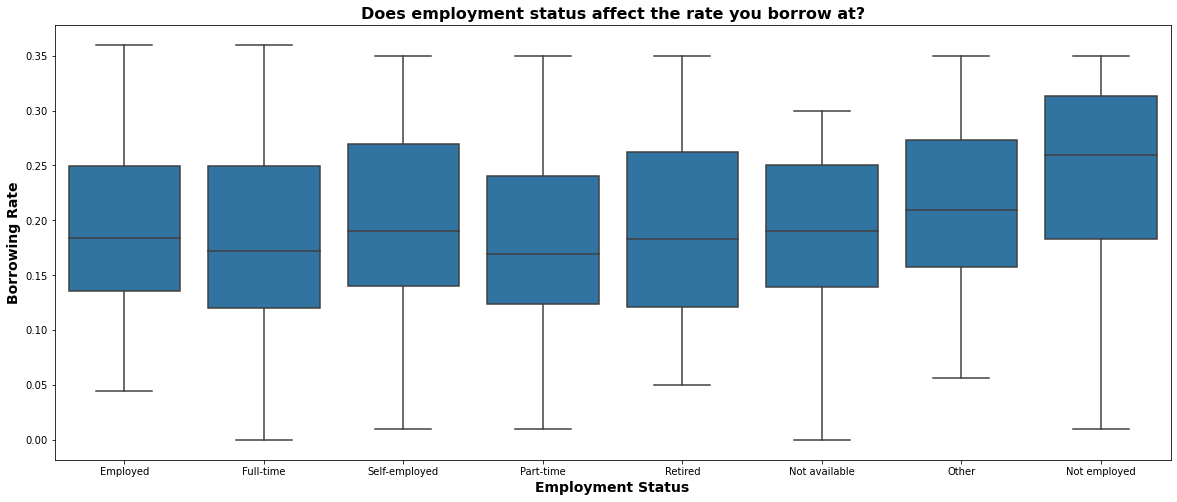

In [78]:
# run the function
box_plot_emp_status()

> Clearly, the employment status plays a role in determining the borrowing rate. It's obvious that employed people are favored by lower borrowing rates (below 20%) as they have proven stream of income. Unlike the unemployed people who borrow at significantly higher rates (above 25%). Among the emplyed group, self-employed and retired groups bear higher interest rates than full & part time employees

In [79]:
def box_plot_loan_status():
    # LoanStatus
    # Does loan status affects the borower's rate?
    plt.figure(figsize=[5, 5])
    sb.boxplot(data=loan_subset, y='LoanStatus', x='BorrowerRate', color = base_color,
               order=gen_status_order)
    plt.title('Does loan status affect the borrowing rate?')
    plt.ylabel('Loan Status')
    plt.xlabel('Borrowing Rate');

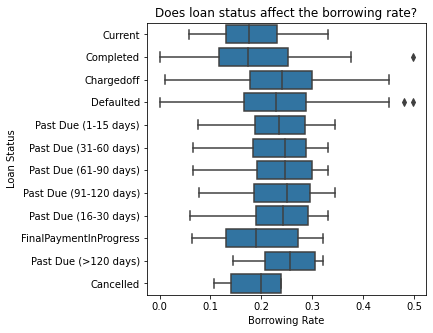

In [80]:
# run the function
box_plot_loan_status()

> Loans that go smooth are evidenced to bear lower interest than loans facing problems in payment

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Borrowing rate was evidenced to decrease as these variables increase:
- Loan amount
- No. of investors funding the loan
- No. of recommendations to receive the loan

> Moreover, the Borrowing rate was found to decrease as:
- The borrower is a home owner (compared to non-home owners)
- The borrower has verified income proof documents (compared to the people who doesn't have these docs)
- The borrower belongs to higher income classes (compared to lower income classes)
- The borrower has a better Credit Rating (compared to low credit borrowers)

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Despite the logical negative relation between borrowing rate & (Loan amount, No. of investors funding the loan, No. of recommendations to receive the loan), this relation seems weak as their correlation coeficients are below 40%  

## 4. Multivariate Exploration



In [81]:
def sctr_plot_investor():
    # consider a scatterplot, bet. Investors & BorrowerRate colored by EmploymentStatus
    g = sb.FacetGrid(data = loan_subset, hue = 'EmploymentStatus',
                     hue_order = ['Employed', 'Full-time', 'Self-employed', 'Part-time', 
                                  'Retired', 'Not available', 'Other', 
                                  'Not employed'], size = 4, aspect = 1.5,palette = 'viridis_r')
    # size =4 and aspect = 1.5 gives us a larger plot 50% longer than its tall
    g.map(sb.regplot, 'Investors', 'BorrowerRate', x_jitter = 0.04, fit_reg = False);
    g.add_legend()
    plt.xlabel('No. of Investors Providing the fund')
    plt.ylabel('Borrowing Rate')
    plt.title('Who gets more helping hands?')

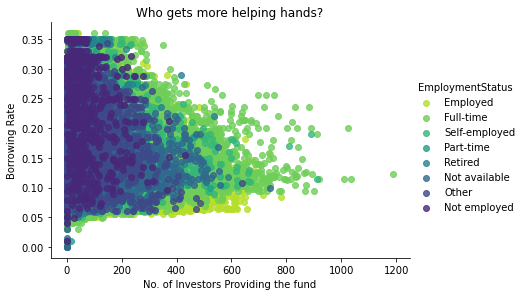

In [82]:
# run cell
sctr_plot_investor()

> Previously, we realized that the number of Investors Providing the fund is negatively related to the charged borrowing rate.  A new insight is that the client can get more support from larger number of investors if he is employed. In case he is unemployed, he'll get fewer helping hands. For example, an employed & unemployed client (both borrow at 10%). The unemployed person would get a support from less than 200 investors, whereas the employed person would get a support from more than 600 investors (in some cases up to 1000)

> **This further raises another question: will the employment status affect the amount of funding?**

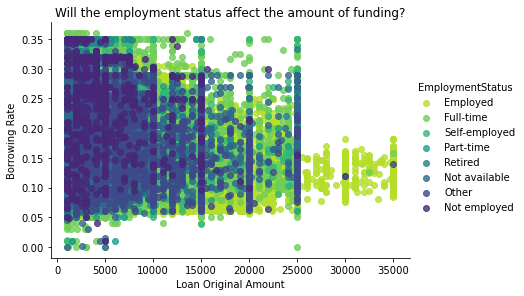

In [83]:
# LoanOriginalAmount
g = sb.FacetGrid(data = loan_subset, hue = 'EmploymentStatus',
                 hue_order = ['Employed', 'Full-time', 'Self-employed', 'Part-time', 
                              'Retired', 'Not available', 'Other', 
                              'Not employed'], size = 4, aspect = 1.5,palette = 'viridis_r')
# size =4 and aspect = 1.5 gives us a larger plot 50% longer than its tall
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrowing Rate')
plt.title('Will the employment status affect the amount of funding?');

> Yes. Not only the interest rate will decline as the amount of loan rises, but also the employed people will get better access for big funding than the unemployed ones (even they are charged the same interest rate)

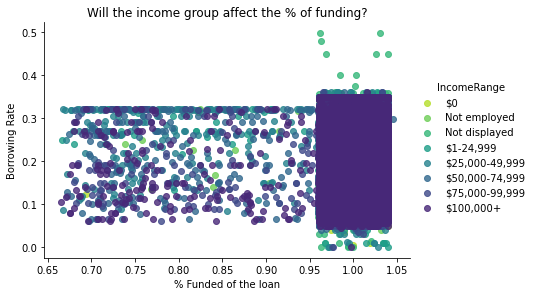

In [84]:
# IncomeRange
g = sb.FacetGrid(data = loan_subset, hue = 'IncomeRange',
                 hue_order = ['$0', 'Not employed', 'Not displayed', '$1-24,999', 
                              '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', 
                              '$100,000+'], size = 4, aspect = 1.5, palette = 'viridis_r')
# size =4 and aspect = 1.5 gives us a larger plot 50% longer than its tall
g.map(sb.regplot, 'PercentFunded', 'BorrowerRate', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('% Funded of the loan')
plt.ylabel('Borrowing Rate')
plt.title('Will the income group affect the % of funding?');

> The major bulk of borrowers who get 100% funding are from the highest income group ( USD 100K+). They also have more access to lower funding schemes than the other groups

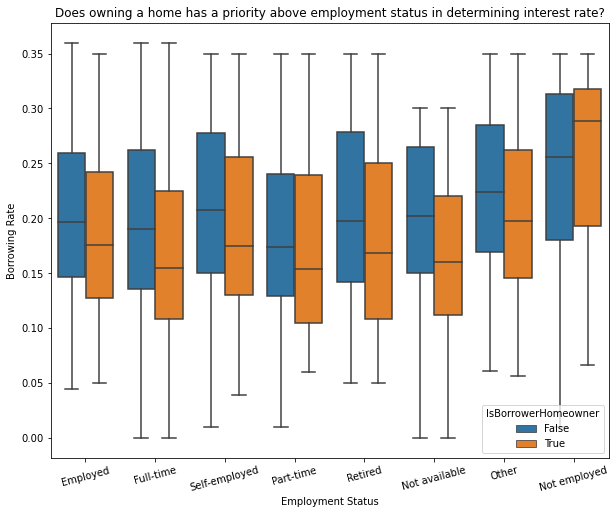

In [85]:
plt.figure(figsize = [10, 8])
sb.boxplot(data = loan_subset, x = 'EmploymentStatus', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');
plt.xticks(rotation = 15)
plt.ylabel('Borrowing Rate')
plt.xlabel('Employment Status')
plt.title('Does owning a home has a priority above employment status in determining interest rate?');

> Generally speaking, being a home owner gives the borrower a priviledge (among his employment status group) to get loans with lower interest. The only exception is the unemployed group where non-home owners pay lower interest (which will be further investigated)

In [86]:
## The investigation: 1st Step

In [87]:
# create a df containing all unemployed
unemp_owner = loan_subset[loan_subset.EmploymentStatus =='Not employed']

In [88]:
# delete all non-home owners
unemp_owner.drop(unemp_owner[unemp_owner['IsBorrowerHomeowner'] ==False].index, inplace = True)

In [89]:
# check it was done correctly
unemp_owner.IsBorrowerHomeowner.value_counts()

True    212
Name: IsBorrowerHomeowner, dtype: int64

In [90]:
# How long are they unemplyed
unemp_owner_dur = unemp_owner.EmploymentStatusDuration.mean()
unemp_owner_dur

45.00473933649289

In [91]:
## The investigation: 2nd Step

In [92]:
# create a df containing all unemployed
unemp_non_owner = loan_subset[loan_subset.EmploymentStatus =='Not employed']

In [93]:
# delete all home owners
unemp_non_owner.drop(unemp_non_owner[unemp_non_owner['IsBorrowerHomeowner'] ==True].index, inplace = True)

In [94]:
# check it was done correctly
unemp_non_owner.IsBorrowerHomeowner.value_counts()

False    623
Name: IsBorrowerHomeowner, dtype: int64

In [95]:
# How long are they unemplyed
unemp_non_owner_dur = unemp_non_owner.EmploymentStatusDuration.mean()
unemp_non_owner_dur

33.06260032102729

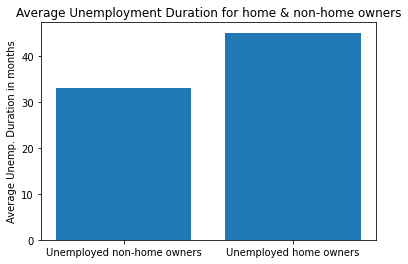

In [96]:
#avergae_retweet_count = merged.groupby('dog_breed').mean().retweet_count

# Create a bar chart with proper labels
locations = [1, 2]
heights = [unemp_non_owner_dur, unemp_owner_dur]
labels = ['Unemployed non-home owners', 'Unemployed home owners']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Unemployment Duration for home & non-home owners')
plt.ylabel('Average Unemp. Duration in months');

> Now it's clear that the unemployed home owners have been - on average - unemplyed for 45 months, whereas the unemployed non-home owners have been - on average - unemplyed for 33 months, that's why the unemployed home owners are charged higher interest rates for their loans.

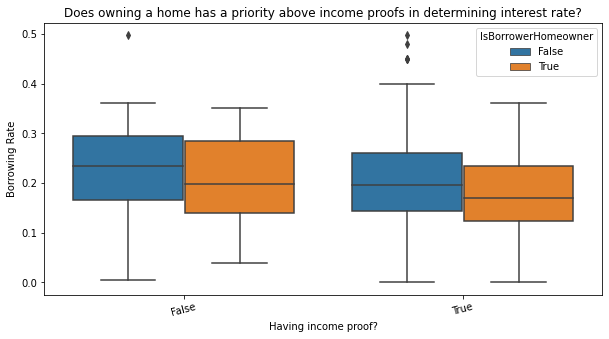

In [97]:
plt.figure(figsize = [10, 5])
sb.boxplot(data = loan_subset, x = 'IncomeVerifiable', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');
plt.xticks(rotation = 15)
plt.ylabel('Borrowing Rate')
plt.xlabel('Having income proof?')
plt.title('Does owning a home has a priority above income proofs in determining interest rate?');

> Intuitively, being a home owner (with the verified income documents) will qualify you to get lower rates for your loan, compared to a non-home owner who also has the verified income documents. A home owner who doesn't have the verified documents will still enjoy a preferential rate against non-home owner who doesn't have the verified documents.

In [98]:
loan_subset['Employ_new'] = np.where

In [99]:
# Now I want to compare the credit rating among only 2 employment status (Employed & not employed)

In [100]:
# Sum Full-time, Part-time, Self-employed to Employed to one category
conditions = [(loan_subset['EmploymentStatus'] =='Employed') | (loan_subset['EmploymentStatus'] =='Full-time')
              | (loan_subset['EmploymentStatus'] =='Self-employed') | (loan_subset['EmploymentStatus'] =='Part-time'),
              (loan_subset['EmploymentStatus'] =='Not employed')]

In [101]:
# create a list of the values we want to assign for each condition
values = ['Employed', 'Not employed']

# create a new column and use np.select to assign values to it using our lists as arguments
loan_subset['Employ_new'] = np.select(conditions, values)

In [102]:
# Still remains the retired
loan_subset.Employ_new.value_counts()

Employed        99965
0               11994
Not employed      835
Name: Employ_new, dtype: int64

In [103]:
# use masking to delete retired
mask2 = (loan_subset.Employ_new =='Employed') | (loan_subset.Employ_new =='Not employed')
 
loan2 =  loan_subset[mask2]
loan2.head()

ListingNumber     ListingCreationDate  Investors  Term CreditRating  \
0         193129 2007-08-26 19:09:29.263        258    36            C   
1        1209647 2014-02-27 08:28:07.900          1    36            A   
3         658116 2012-10-22 11:02:35.010        158    36            A   
4         909464 2013-09-14 18:38:39.097         20    36            D   
5        1074836 2013-12-14 08:26:37.093          1    60            B   

  LoanStatus  BorrowerAPR  BorrowerRate  LenderYield  ProsperScore  ...  \
0  Completed      0.16516        0.1580       0.1380           NaN  ...   
1    Current      0.12016        0.0920       0.0820           7.0  ...   
3    Current      0.12528        0.0974       0.0874           9.0  ...   
4    Current      0.24614        0.2085       0.1985           4.0  ...   
5    Current      0.15425        0.1314       0.1214          10.0  ...   

  EmploymentStatus EmploymentStatusDuration IsBorrowerHomeowner  \
0    Self-employed                      2.0                True   
1         Employed                     44.0               False   
3         Employed                    113.0                True   
4         Employed                     44.0                True   
5         Employed                     82.0                True   

      IncomeRange  IncomeVerifiable TotalProsperLoans  LoanOriginalAmount  \
0  $25,000-49,999              True               NaN                9425   
1  $50,000-74,999              True               NaN               10000   
3  $25,000-49,999              True               NaN               10000   
4       $100,000+              True               1.0               15000   
5       $100,000+              True               NaN               15000   

   PercentFunded  Recommendations  Employ_new  
0            1.0                0    Employed  
1            1.0                0    Employed  
3            1.0                0    Employed  
4            1.0                0    Employed  
5            1.0                0    Employed  

[5 rows x 22 columns]

In [104]:
# Ensure it was done correctly
loan2.Employ_new.value_counts()

Employed        99965
Not employed      835
Name: Employ_new, dtype: int64

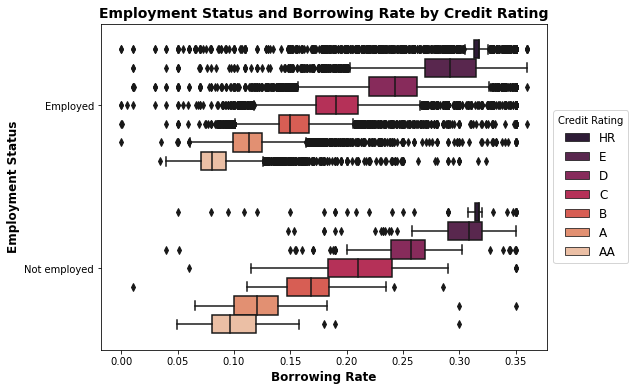

In [105]:
plt.figure(figsize = [8, 6])
sb.boxplot(data = loan2, y = 'Employ_new', x = 'BorrowerRate', hue = 'CreditRating',
          palette = 'rocket');
plt.xlabel('Borrowing Rate', fontsize=12, weight="bold")
plt.ylabel('Employment Status', fontsize=12, weight="bold");
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title='Credit Rating', fontsize=12)
plt.title('Employment Status and Borrowing Rate by Credit Rating', fontsize=14, weight="bold");

> Even within the same credit rating category, employed people will be charged a lower borrowing rate than the unemployed people

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my visualization to see if there're certain criteria that supports the borrower to get a loan with lower interest rate. I found that even within the same group (like credit rating and having income proofs), borrowers can be charged lower borrowing rates as they meet further conditions (like being employed)

### Were there any interesting or surprising interactions between features?

> I found that the unemployed home owners are charged higher interest at their loans, than the unemployed non-home owners. This surprising insight induced me to dig deeper to understand this mystery. After investigation, I found that the unemployed home owners pay higher interest because they've been unemployed for longer period of time (45 months), whereas the unemployed non-home owners have been unemployed for 33 months